In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

cars = pd.read_csv('~/data/cars.csv')
brand = pd.read_csv('~/data/brand.csv')

In [2]:
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [4]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [6]:
cars.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


# 할 일 순서

- [] cars merge brands
- [] category -> numeric
    - [] Engine
    - [] Emission Class
- [] missing value
   -  [] Service history NaN -> 'Unknown'
   -  [] drop the rows > NaN value threshold
- [] outlier
- [] group by
    - [] 국가별 브랜드 개수
- [] one hot encoding / log
- [] scaling
- [] PCA
    - [] 70%+, min #PC
    - [] corr 변수들 확인해보기

## Merge
### title -> 브랜드 / 모델명 분리 후 브랜드에서 country 매칭

In [7]:
cars['brand'] = cars['title'].apply(lambda x: x.split()[0].lower())
cars

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda


In [8]:
cars['brand'].value_counts()

vauxhall         550
ford             410
volkswagen       272
bmw              269
peugeot          245
toyota           195
nissan           180
renault          175
mercedes-benz    168
audi             147
honda            108
fiat             104
mini              97
citroen           96
hyundai           93
kia               82
skoda             63
seat              60
mazda             54
suzuki            41
volvo             40
land              35
mitsubishi        33
jaguar            30
alfa              18
chevrolet         14
dacia             14
subaru            11
mg                10
lexus              9
jeep               9
saab               7
infiniti           7
ds                 6
chrysler           5
rover              5
smart              4
maserati           3
abarth             3
proton             3
porsche            3
daihatsu           2
ssangyong          2
dodge              1
daewoo             1
marcos             1
lagonda            1
isuzu        

In [10]:
cars = cars.merge(brand, left_on = 'brand', right_on = 'title', how = 'left')

In [11]:
cars

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,honda,Japan


In [15]:
cars.rename({'title_x' : 'model'}, axis = 1, inplace = True)

In [18]:
cars = cars.drop('title_y', axis = 1)

In [23]:
cars['model'] = cars['model'].apply(lambda x: x.split()[1])

In [24]:
cars

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,3,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


# 결측치
- [] missing value
   - [v] Service history NaN -> 'Unknown'
   -  [v] drop the rows > NaN value threshold

In [25]:
cars.isna().sum()

model                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
brand                   0
country                 0
dtype: int64

In [26]:
cars.isna().mean()

model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

In [28]:
cars['Service history'].fillna('Unknown', inplace = True)

In [29]:
cars.isna().mean()

# Previous Owners , Engine , Doors , Seats , Emission Class
## 5개 컬럼 중 3개 이상 NA 면 드랍

model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

In [54]:
cars = cars.dropna(thresh = len(cars.columns) - 3)

In [55]:
cars

# 3687 -> 3647 rows

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,South Korea
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,renault,France
3683,A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,audi,Germany
3684,3,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,bmw,Germany
3685,ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [33]:
# 결측치 어떻게 채우지..?
## 1% 미만은 드랍
### Doors, Seats, Engine

cars.isna().mean()


model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

In [34]:
cars.dropna(subset = ['Doors', 'Seats', 'Engine'])

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,South Korea
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,renault,France
3683,A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,audi,Germany
3684,3,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,bmw,Germany
3685,ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


# Note

- 1% 미만 결측치 비율은 그냥 다 날려버리려고 했는데, 그랬더니 3개 컬럼에 다 적용하니 몇 천개 데이터 중에 70여 개가 날아간다
- 안되겠다. 브랜드와 모델명이 같은 애들을 찾아서 결측치 채워넣어줘야겠다
- groupby model&brand, fillna
- 위에서 3개 이상 NA 시 삭제한 셀도 실행 취소하고 얘부터 실행한 다음 다시 실행 -> 행 개수 3674

- **다른 팀원분들은 이 고민을 길게 하기보다 mean/median 으로 채워넣고 다음 단계로 넘어간듯 하다**

In [50]:
columns_to_fill = ['Doors', 'Seats', 'Engine', 'Emission Class']

cars[columns_to_fill] =  cars.groupby(['model', 'brand'])[columns_to_fill].apply(lambda x: x.fillna(method = 'ffill').fillna(method = 'bfill'))

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [77]:
cars.isna().mean()

# 줄긴 줄었는데.. 이제 남은걸 진짜 다 날려야 하나

model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.008710
Gearbox              0.000000
Doors                0.001089
Seats                0.004083
Emission Class       0.013609
Service history      0.000000
brand                0.000000
country              0.000000
Engine_class         0.008710
Engine_category      0.008710
dtype: float64

In [39]:
cars.dropna(subset = ['Doors', 'Seats', 'Engine'])

# 50여 행 날리나?

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,South Korea
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,renault,France
3683,A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,audi,Germany
3684,3,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,bmw,Germany
3685,ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [81]:
# median 으로 다 채워넣자

cars['Previous Owners'] = cars['Previous Owners'].fillna(cars['Previous Owners'].median())

In [98]:
# for 문으로 넣기

for col in ['Doors', 'Seats', 'Engine_class', 'Engine_category']:
    cars[col] = cars[col].fillna(cars[col].median())

In [102]:
cars.isna().mean()

model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.000000
Fuel type            0.000000
Body type            0.000000
Gearbox              0.000000
Doors                0.000000
Seats                0.000000
Emission Class       0.013609
Service history      0.000000
brand                0.000000
country              0.000000
Engine_class         0.000000
Engine_category      0.000000
dtype: float64

In [107]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              3674 non-null   object 
 1   Price              3674 non-null   int64  
 2   Mileage(miles)     3674 non-null   int64  
 3   Registration_Year  3674 non-null   int64  
 4   Previous Owners    3674 non-null   float64
 5   Fuel type          3674 non-null   object 
 6   Body type          3674 non-null   object 
 7   Gearbox            3674 non-null   object 
 8   Doors              3674 non-null   float64
 9   Seats              3674 non-null   float64
 10  Emission Class     3624 non-null   object 
 11  Service history    3674 non-null   object 
 12  brand              3674 non-null   object 
 13  country            3674 non-null   object 
 14  Engine_class       3674 non-null   float64
 15  Engine_category    3674 non-null   int64  
dtypes: float64(4), int64(4),

In [148]:
# Emission Class

cars['Emission Class'] =  cars['Emission Class'].astype('string')
cars['Emission Class'] =  cars['Emission Class'].apply(lambda x: x.split(' ')[1] if pd.notna(x) and len(x.split(' ')) > 1  else x)

In [149]:
# 이제 결측치 채워주기
# ## string 은 못채워준다
# cars['Emission Class'] =  cars['Emission Class'].astype('int')
cars['Emission Class'].fillna(cars['Emission Class'].median())


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3682   NaN
3683   NaN
3684   NaN
3685   NaN
3686   NaN
Name: Emission Class, Length: 3674, dtype: float64

In [134]:
cars['Emission Class'] =  cars['Emission Class'].astype('int')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NAType'

In [132]:
# 에러가 어디서 나나 보기 위해 GPT 에게 Try Except 짜달라고 함

# Assuming your DataFrame is named cars
# Replace 'cars' with the actual name of your DataFrame if it's different

# Iterate through the 'Emission Class' column
for idx, value in enumerate(cars['Emission Class']):
    try:
        # Attempt to convert the value to an integer
        int_value = int(value)
    except ValueError:
        # If a ValueError is raised, print the row index and the problematic value
        print(f"Row {idx} has a value error with 'Emission Class': {value}")


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NAType'

# Note
- NAType 때문에 엄청 뱅뱅 돌았다.. gpt 에게 탈출구를 알려달라고 해서 빠져나간다 -> 이거도 실패
- 헤어나올 수 없는 데이터타입의 늪..
- NAType 과 NA 가 다른거라니..
- (10분 경과)
- 여전히 헤어나오지 못하고 있어서 Emission Class 컬럼은 드랍한다. engine 과 model 과 다중공산성이 있을거 같아 날릴까 했는데 괜히 가지고 있었다..

In [141]:
# GPT 
import pandas as pd

# Assuming your DataFrame is named cars
# Replace 'cars' with the actual name of your DataFrame if it's different

# Function to extract numeric part from the 'Emission Class' string and convert to int
def extract_and_convert(emission):
    if pd.isna(emission):
        return pd.NA  # Return NA or you can choose to return a default value like 0
    parts = emission.split()
    if len(parts) >= 2 and parts[1].isdigit():
        return int(parts[1])
    return pd.NA  # Return NA for non-conforming data or handle differently

# Apply the function to the 'Emission Class' column
cars['Emission Class'] = cars['Emission Class'].apply(extract_and_convert)

# Now 'Emission Class' should contain integers or NA values


In [145]:
print(cars['Emission Class'].dtype)

object


In [154]:
cars.drop('Emission Class', axis = 1, inplace = True)

In [156]:
cars.isna().mean()

model                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Previous Owners      0.0
Fuel type            0.0
Body type            0.0
Gearbox              0.0
Doors                0.0
Seats                0.0
Service history      0.0
brand                0.0
country              0.0
Engine_class         0.0
Engine_category      0.0
dtype: float64

# Note

- missing value 가 있으면 numeric 이 안되고
- numeric 변환이 안되면 median 으로 missing value 를 채워줄 수가 없다
- **if 로 경우 나눠서 일단 변환해준 후 나중에 na 값을 채워준다**
    - cars['Emission Class'] = cars['Emission Class'].apply(lambda x: x.split(' ')[1] if pd.notna(x) and len(x.split(' ')) > 1 else x)


In [101]:
cars.drop('Engine', axis = 1, inplace = True)

In [103]:
cars.corr()

# door 와 seat 는 결측치 상관 없어. Previous Owners 는 중요
## 그렇다면 Prev Owner 가 missing 이었다는 칼럼 하나 추가해주고, fillna(median)

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_class,Engine_category
Price,1.000000,-0.500791,0.724554,-0.402159,0.113568,-0.027455,-0.023152,-0.070174
Mileage(miles),-0.500791,1.000000,-0.412872,0.262901,-0.037944,0.095172,0.331756,0.308156
Registration_Year,0.724554,-0.412872,1.000000,-0.393908,0.216726,0.031410,-0.289978,-0.284963
Previous Owners,-0.402159,0.262901,-0.393908,1.000000,-0.121681,-0.028686,0.148087,0.147221
Doors,0.113568,-0.037944,0.216726,-0.121681,1.000000,0.490206,-0.062044,0.014383
Seats,-0.027455,0.095172,0.031410,-0.028686,0.490206,1.000000,0.073423,0.095324
Engine_class,-0.023152,0.331756,-0.289978,0.148087,-0.062044,0.073423,1.000000,0.827433
Engine_category,-0.070174,0.308156,-0.284963,0.147221,0.014383,0.095324,0.827433,1.000000


In [104]:
cars

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,Engine_class,Engine_category
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic,1.4,0
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom,1.2,0
2,I30,949,137000,2011,3.0,Petrol,Hatchback,Manual,5.0,5.0,Euro 5,Unknown,hyundai,South Korea,1.4,0
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom,1.4,0
4,CORSA,1000,85000,2013,3.0,Diesel,Hatchback,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,Manual,5.0,5.0,Euro 4,Unknown,renault,France,1.6,1
3683,A4,6990,119000,2012,3.0,Petrol,Saloon,Manual,4.0,5.0,Euro 5,Unknown,audi,Germany,2.0,1
3684,3,3995,139000,2013,3.0,Diesel,Saloon,Manual,4.0,5.0,Euro 5,Unknown,bmw,Germany,2.0,1
3685,ACCORD,1390,179190,2007,3.0,Diesel,Estate,Manual,5.0,5.0,Euro 4,Full,honda,Japan,2.2,1


# 중간 노트
- missing value 채워 넣는게 생각보다 어렵다
- 루브릭 보니 카테고리 -> 뉴메릭 이 먼저 나오는데, 이거부터 할 걸 그랬다

- [] category -> numeric
    - [v] Engine
    - [v] Emission Class
    
- 일단 중간에 순서 바꾸기. 결측치 먼저 하는게 아닌가? 선후 관계가 어떨 때 중요해지는지 모르겠다
- (15분 경과)
- 순서는 중요하지 않았던 것 같다. 차라리 원래대로 결측치 먼저 하고 하는게 자연스러웠을 듯
- **NaN 은 astype 변환을 해줄 수 없기때문에 결측치 먼저 하는게 좋았겠다**
- (30분 경과)
- fillna 를 median 값 넣어주려면 object 인 애들을 다 numeric 으로 바꿔줘야 하기때문에 **category -> numeric 을 먼저 해줘야 한다**

# categorical -> numeric
- Engine
- Emission Class

In [60]:
cars['Engine'].value_counts().sort_index()

0.8L      2
0.9L     15
1.0L    326
1.1L     39
1.2L    521
1.3L    170
1.4L    422
1.5L    294
1.6L    737
1.7L     35
1.8L    158
1.9L     31
2.0L    551
2.1L     63
2.2L     75
2.3L      4
2.4L     28
2.5L     33
2.6L      4
2.7L     11
2.8L      3
3.0L     79
3.1L      1
3.2L      7
3.3L      1
3.5L     10
3.7L      5
4.2L      4
4.3L      2
4.4L      5
4.8L      1
5.0L      3
5.5L      1
6.3L      1
Name: Engine, dtype: int64

In [68]:
cars['Engine_class'] = cars['Engine'].str.extract('(\d+\.\d+)').astype('float')

In [70]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              3674 non-null   object 
 1   Price              3674 non-null   int64  
 2   Mileage(miles)     3674 non-null   int64  
 3   Registration_Year  3674 non-null   int64  
 4   Previous Owners    2267 non-null   float64
 5   Fuel type          3674 non-null   object 
 6   Body type          3674 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3674 non-null   object 
 9   Doors              3670 non-null   float64
 10  Seats              3659 non-null   float64
 11  Emission Class     3624 non-null   object 
 12  Service history    3674 non-null   object 
 13  brand              3674 non-null   object 
 14  country            3674 non-null   object 
 15  Engine_class       3642 non-null   float64
dtypes: float64(4), int64(3),

In [96]:
bins = [0, 1.5, 2.5, float('inf')]
labels = ['0', '1', '2']
# ['small', 'medium', 'large'] 으로 했다가 숫자형으로 다시 변환


cars['Engine_category'] = pd.cut(cars['Engine_class'], bins=bins, labels=labels)

In [97]:
cars['Engine_category'] = cars['Engine_category'].astype(int)

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 0 to 3686
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              3674 non-null   object 
 1   Price              3674 non-null   int64  
 2   Mileage(miles)     3674 non-null   int64  
 3   Registration_Year  3674 non-null   int64  
 4   Previous Owners    3674 non-null   float64
 5   Fuel type          3674 non-null   object 
 6   Body type          3674 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3674 non-null   object 
 9   Doors              3674 non-null   float64
 10  Seats              3674 non-null   float64
 11  Emission Class     3624 non-null   object 
 12  Service history    3674 non-null   object 
 13  brand              3674 non-null   object 
 14  country            3674 non-null   object 
 15  Engine_class       3674 non-null   float64
 16  Engine_category    3674 

In [66]:
cars['Emission Class'].value_counts()
# cars['Emission Class'].unique()

Euro 5    1266
Euro 6    1113
Euro 4    1077
Euro 3     139
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

In [159]:
cars.drop('Engine_class', axis = 1, inplace = True)

# Outlier
- [] outlier
    - [v]생산년도 2025
- [v] group by
    - [v] 국가별 브랜드 개수

In [48]:
# cars.groupby(['country', 'brand']).sum()
## 이게 아니었어

cars.groupby('country')['brand'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: brand, dtype: int64

In [161]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3674 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              3674 non-null   object 
 1   Price              3674 non-null   int64  
 2   Mileage(miles)     3674 non-null   int64  
 3   Registration_Year  3674 non-null   int64  
 4   Previous Owners    3674 non-null   float64
 5   Fuel type          3674 non-null   object 
 6   Body type          3674 non-null   object 
 7   Gearbox            3674 non-null   object 
 8   Doors              3674 non-null   float64
 9   Seats              3674 non-null   float64
 10  Service history    3674 non-null   object 
 11  brand              3674 non-null   object 
 12  country            3674 non-null   object 
 13  Engine_category    3674 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 559.6+ KB


In [163]:
cars['Fuel type'].value_counts()

Petrol                   2354
Diesel                   1215
Petrol Hybrid              46
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [164]:
cars['Body type'].value_counts()

Hatchback      2274
SUV             461
Saloon          366
Estate          170
MPV             151
Coupe           137
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: Body type, dtype: int64

In [165]:
cars['Gearbox'].value_counts()

Manual       2865
Automatic     809
Name: Gearbox, dtype: int64

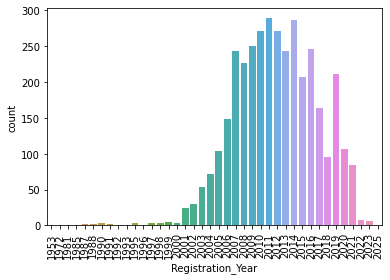

In [174]:
import matplotlib.pyplot as plt

sns.countplot(x='Registration_Year', data=cars)

plt.xticks(rotation=90)
plt.show()


In [176]:
cars[(cars['Registration_Year'] < 1990) | (cars['Registration_Year'] > 2023)]

# 놀랍게도.. 옛날 차들도 찐인거같다. 2025만 제거

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Gearbox,Doors,Seats,Service history,brand,country,Engine_category
8,740,750,225318,2025,3.0,Petrol,Estate,Automatic,5.0,5.0,Unknown,volvo,Sweden,1
237,MIDGET,1875,75043,1972,3.0,Petrol,Convertible,Manual,2.0,5.0,Unknown,mg,United Kingdom,0
1173,GOLF,2500,124000,1988,7.0,Petrol,Hatchback,Automatic,5.0,5.0,Unknown,volkswagen,Germany,1
1195,944,6750,121000,1987,7.0,Petrol,Coupe,Manual,2.0,4.0,Unknown,porsche,Germany,1
1239,SUNNY,999,60000,1985,3.0,Petrol,Saloon,Manual,4.0,5.0,Unknown,nissan,Japan,0
1353,3,3495,115000,1987,4.0,Petrol,Saloon,Automatic,4.0,5.0,Unknown,bmw,Germany,1
2375,MARTINA,11495,19000,1981,5.0,Petrol,Convertible,Manual,5.0,2.0,Unknown,marcos,United Kingdom,1
3024,LG6,14995,84000,1953,3.0,Petrol,Saloon,Manual,4.0,5.0,Unknown,lagonda,United Kingdom,2
3116,GOLF,7000,130000,1988,1.0,Petrol,Convertible,Manual,2.0,5.0,Unknown,volkswagen,Germany,1


In [178]:
cars = cars[cars['Registration_Year'] <= 2023]

# One Hot Encoding
- 국가들을 대륙으로 묶어줘야겠다

In [180]:
cars['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'France', 'Germany', 'Japan', 'Sweden', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

In [184]:
# map country-continent
country_to_continent = {
    'Czech Republic': 'Europe',
    'United Kingdom': 'Europe',
    'South Korea': 'Asia',
    'United States': 'North America',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'Sweden': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Malaysia': 'Asia',
    'Romania': 'Europe'
}
cars['continent'] = cars['country'].map(country_to_continent)

/tmp/ipykernel_32/2225065889.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['continent'] = cars['country'].map(country_to_continent)


In [185]:
cars

,model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Gearbox,Doors,Seats,Service history,brand,country,Engine_category,continent
0,FABIA,6900,70189,2016,3.0,Diesel,Hatchback,Manual,5.0,5.0,Unknown,skoda,Czech Republic,0,Europe
1,CORSA,1495,88585,2008,4.0,Petrol,Hatchback,Manual,3.0,5.0,Full,vauxhall,United Kingdom,0,Europe
2,I30,949,137000,2011,3.0,Petrol,Hatchback,Manual,5.0,5.0,Unknown,hyundai,South Korea,0,Asia
3,HATCH,2395,96731,2010,5.0,Petrol,Hatchback,Manual,3.0,4.0,Full,mini,United Kingdom,0,Europe
4,CORSA,1000,85000,2013,3.0,Diesel,Hatchback,Manual,5.0,5.0,Unknown,vauxhall,United Kingdom,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,Manual,5.0,5.0,Unknown,renault,France,1,Europe
3683,A4,6990,119000,2012,3.0,Petrol,Saloon,Manual,4.0,5.0,Unknown,audi,Germany,1,Europe
3684,3,3995,139000,2013,3.0,Diesel,Saloon,Manual,4.0,5.0,Unknown,bmw,Germany,1,Europe
3685,ACCORD,1390,179190,2007,3.0,Diesel,Estate,Manual,5.0,5.0,Full,honda,Japan,1,Asia


In [188]:
# model 과 country 는 드랍

cars = cars.drop(['model', 'country'], axis = 1)

In [181]:
cars['brand'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'peugeot', 'bmw',
       'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen', 'honda',
       'mg', 'toyota', 'volvo', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [190]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              3673 non-null   int64  
 1   Mileage(miles)     3673 non-null   int64  
 2   Registration_Year  3673 non-null   int64  
 3   Previous Owners    3673 non-null   float64
 4   Fuel type          3673 non-null   object 
 5   Body type          3673 non-null   object 
 6   Gearbox            3673 non-null   object 
 7   Doors              3673 non-null   float64
 8   Seats              3673 non-null   float64
 9   Service history    3673 non-null   object 
 10  brand              3673 non-null   object 
 11  Engine_category    3673 non-null   int64  
 12  continent          3673 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 401.7+ KB


In [189]:
pd.set_option('display.max_columns', 50)

In [194]:
cars_df = pd.get_dummies(cars, columns = ['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'continent'], drop_first = True)

In [215]:
cars_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_category,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,brand_alfa,brand_audi,...,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,continent_Europe,continent_North America
0,6900,70189,2016,3.0,5.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1495,88585,2008,4.0,3.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,949,137000,2011,3.0,5.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2395,96731,2010,5.0,3.0,4.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,3.0,5.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,5.0,5.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3683,6990,119000,2012,3.0,4.0,5.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3684,3995,139000,2013,3.0,4.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3685,1390,179190,2007,3.0,5.0,5.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Scaling



In [197]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [205]:
ss_df = pd.DataFrame(ss.fit_transform(cars_df), columns = cars_df.columns)
ss_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_category,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,brand_alfa,brand_audi,...,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,continent_Europe,continent_North America
count,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,...,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03,3.673000e+03
mean,9.285612e-17,-6.190408e-17,6.979685e-15,1.392842e-16,8.898711e-17,7.447834e-16,1.083321e-16,5.803507e-18,1.547602e-17,1.470222e-16,2.708303e-17,5.416607e-17,-4.497718e-17,-1.547602e-17,-9.672512e-19,1.160701e-16,-2.611578e-17,3.869005e-18,-1.934502e-17,4.642806e-17,-5.416607e-17,8.511811e-17,-6.577308e-17,3.385379e-17,1.547602e-17,...,-2.321403e-17,3.578829e-17,6.964209e-17,1.934502e-17,1.934502e-17,-4.642806e-17,-3.869005e-17,3.095204e-17,-2.418128e-17,-2.708303e-17,-6.190408e-17,6.770758e-18,-1.160701e-17,4.062455e-17,5.416607e-17,-5.803507e-18,5.803507e-18,-1.934502e-17,1.160701e-17,-6.190408e-17,-4.449356e-17,1.692690e-17,5.174794e-17,-9.285612e-17,-3.869005e-18
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,...,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-1.201612e+00,-2.065375e+00,-1.158675e+01,-1.543978e+00,-2.353211e+00,-5.041842e+00,-9.692442e-01,-1.650246e-02,-9.225945e-02,-1.335131e+00,-1.126173e-01,-8.605449e-02,-1.748817e-01,-1.968358e-01,-2.196146e-01,-1.274930e+00,-2.070589e-01,-1.650246e-02,-2.859088e-02,-3.788460e-01,-3.326775e-01,-1.883027e+00,-2.416578e+00,-7.017664e-02,-2.034575e-01,...,-2.859088e-02,-1.209995e-01,-2.189327e-01,-5.224943e-02,-1.646975e-01,-9.374857e-02,-2.256765e-01,-2.673392e-01,-2.859088e-02,-2.859088e-02,-2.236707e-01,-3.692074e-02,-4.369712e-02,-1.288670e-01,-1.321042e-01,-3.301841e-02,-2.334118e-02,-5.480714e-02,-1.062476e-01,-2.354990e-01,-4.192091e-01,-2.822393e-01,-1.035952e-01,-1.388894e+00,-3.679594e-01
25%,-7.356999e-01,-6.178589e-01,-7.568567e-01,-7.236350e-01,-1.339686e+00,1.722412e-01,-9.692442e-01,-1.650246e-02,-9.225945e-02,-1.335131e+00,-1.126173e-01,-8.605449e-02,-1.748817e-01,-1.968358e-01,-2.196146e-01,-1.274930e+00,-2.070589e-01,-1.650246e-02,-2.859088e-02,-3.788460e-01,-3.326775e-01,5.310597e-01,4.138082e-01,-7.017664e-02,-2.034575e-01,...,-2.859088e-02,-1.209995e-01,-2.189327e-01,-5.224943e-02,-1.646975e-01,-9.374857e-02,-2.256765e-01,-2.673392e-01,-2.859088e-02,-2.859088e-02,-2.236707e-01,-3.692074e-02,-

In [206]:
rs_df = pd.DataFrame(rs.fit_transform(cars_df), columns = cars_df.columns)
rs_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_category,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,brand_alfa,brand_audi,...,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,continent_Europe,continent_North America
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,...,3673.000000,3673.00000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,0.325200,0.028396,-0.019534,-0.117887,-0.339096,-0.099102,-0.449496,0.000272,0.008440,-0.359379,0.012524,0.007351,0.029676,0.037299,0.046011,-0.380888,0.041111,0.000272,0.000817,0.125510,0.099646,-0.219984,-0.146202,0.004901,0.039750,...,0.000817,0.01443,0.045739,0.002723,0.026409,0.008712,0.048462,0.066703,0.000817,0.000817,0.047645,0.001361,0.001906,0.016335,0.017152,0.001089,0.000545,0.002995,0.011163,0.052546,0.149469,0.073782,0.010618,-0.341410,0.119249
std,0.814975,0.855603,0.634903,1.219168,0.493395,0.575443,0.568049,0.016500,0.091493,0.479884,0.111222,0.085434,0.169715,0.189520,0.209538,0.485671,0.198574,0.016500,0.028571,0.331342,0.299568,0.414292,0.353357,0.069842,0.195397,...,0.028571,0.11927,0.208947,0.052114,0.160370,0.092944,0.214769,0.249541,0.028571,0.028571,0.213043,0.036875,0.043620,0.126779,0.129856,0.032987,0.023332,0.054650,0.105076,0.223155,0.356599,0.261451,0.102509,0.474247,0.324125
min,-0.653951,-1.738504,-7.375000,-2.000000,-1.500000,-3.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-0.274296,-0.500174,-0.500000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.725704,0.499826,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [207]:
mm_df = pd.DataFrame(mm.fit_transform(cars_df), columns = cars_df.columns)
mm_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_category,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,brand_alfa,brand_audi,...,brand_maserati,brand_mazda,brand_mercedes-benz,brand_mg,brand_mini,brand_mitsubishi,brand_nissan,brand_peugeot,brand_porsche,brand_proton,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_ssangyong,brand_subaru,brand_suzuki,brand_toyota,brand_vauxhall,brand_volkswagen,brand_volvo,continent_Europe,continent_North America
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,...,3673.000000,3673.00000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,0.160902,0.073242,0.840625,0.235264,0.773936,0.580180,0.275252,0.000272,0.008440,0.640621,0.012524,0.007351,0.029676,0.037299,0.046011,0.619112,0.041111,0.000272,0.000817,0.125510,0.099646,0.780016,0.853798,0.004901,0.039750,...,0.000817,0.01443,0.045739,0.002723,0.026409,0.008712,0.048462,0.066703,0.000817,0.000817,0.047645,0.001361,0.001906,0.016335,0.017152,0.001089,0.000545,0.002995,0.011163,0.052546,0.149469,0.073782,0.010618,0.658590,0.119249
std,0.133924,0.035467,0.072560,0.152396,0.328930,0.115089,0.284025,0.016500,0.091493,0.479884,0.111222,0.085434,0.169715,0.189520,0.209538,0.485671,0.198574,0.016500,0.028571,0.331342,0.299568,0.414292,0.353357,0.069842,0.195397,...,0.028571,0.11927,0.208947,0.052114,0.160370,0.092944,0.214769,0.249541,0.028571,0.028571,0.213043,0.036875,0.043620,0.126779,0.129856,0.032987,0.023332,0.054650,0.105076,0.223155,0.356599,0.261451,0.102509,0.474247,0.324125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062388,0.051331,0.785714,0.125000,0.333333,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.107463,0.072065,0.842857,0.250000,1.000000,0.600000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.226716,0.092784,0.900000,0.250000,1.000000,0.600000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# PCA

In [220]:
from sklearn.decomposition import PCA

pca = PCA(1)

In [221]:
pca.fit_transform(cars_df)

array([[-11163.09496208],
       [  7513.32433874],
       [ 55879.58196618],
       ...,
       [ 57701.07880435],
       [ 97974.37696631],
       [  1069.9146291 ]])

In [217]:
(pca.explained_variance_ratio_).sum()

# PCA 를 3 2 1 개 변수로 해도 다 0.99 인데..?


0.9999999983014207

## Node 16 에서 가져온 Elbow Point Finder

### 1. ss_fit

In [224]:
# 데이터의 스케일을 맞춰놓았으니, 이번에는 차원 축소(Dimensionality Reduction)를 진행할 차례네요!
## 여기서는 PCA 라는 선형 차원 축소 기법을 사용해봅시다. PCA 의 PC들이 포착하지 못해서 날라간 정보들은 다른 DR 방법을 통해 보완할 수 있어요

# PCA 불러오기  
from sklearn.decomposition import PCA


# PCA 적용
pca = PCA().fit(ss_df)

print(pca)
print(type(pca))

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ 
    # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
    # EVR: 각 주성분이 데이터의 분산을 얼마나 포착하는지를 나타내는 비율


cumulative_explained_variance = np.cumsum(explained_variance_ratio) 
    # cumsum: 각 원소의 누적합을 계산하는 함수


PCA()
<class 'sklearn.decomposition._pca.PCA'>


<function matplotlib.pyplot.show(close=None, block=None)>

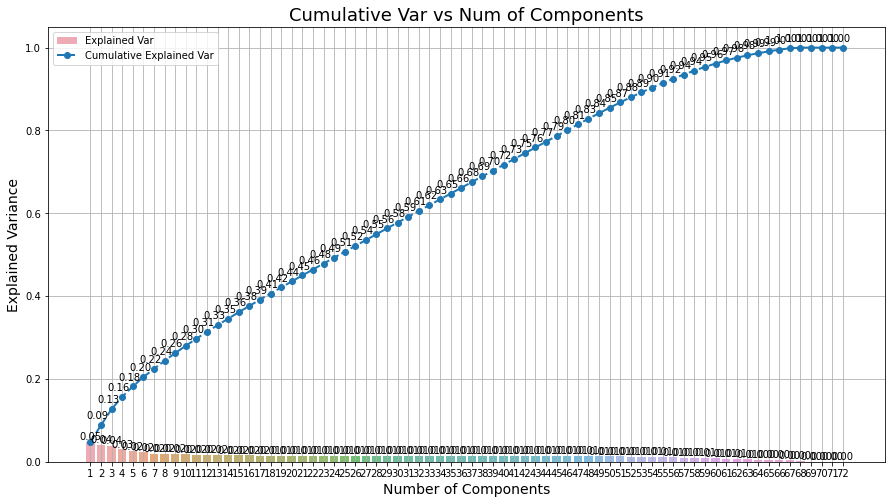

In [225]:
# 시각화

plt.figure(figsize=(15,8))

# 각 성분의 EVR에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) +1)) , y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 line graph
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Var vs Num of Components', fontsize=18)

# 눈금 및 범례 설정
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
              labels=['Explained Var', 'Cumulative Explained Var'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
        plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha ='center', va= 'bottom', fontsize=10)
        if i > 0:
            plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='both')
plt.show

### 2. rs_df

PCA()
<class 'sklearn.decomposition._pca.PCA'>


<function matplotlib.pyplot.show(close=None, block=None)>

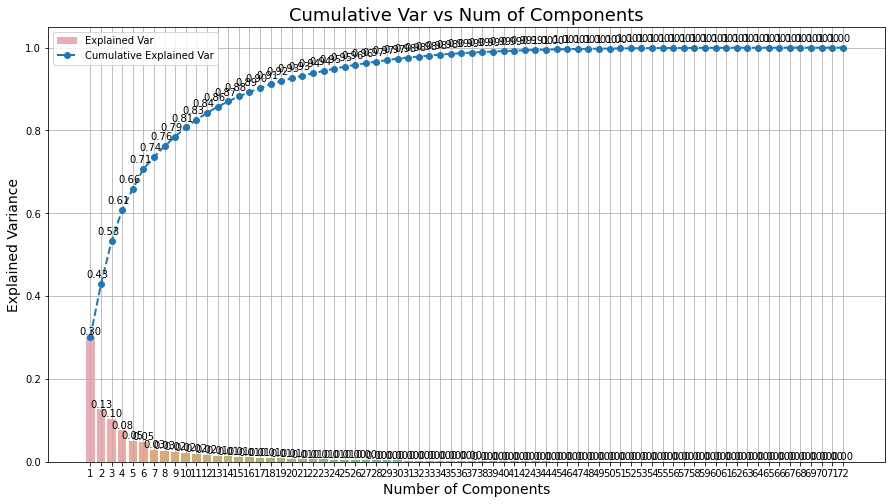

In [226]:
# 데이터의 스케일을 맞춰놓았으니, 이번에는 차원 축소(Dimensionality Reduction)를 진행할 차례네요!
## 여기서는 PCA 라는 선형 차원 축소 기법을 사용해봅시다. PCA 의 PC들이 포착하지 못해서 날라간 정보들은 다른 DR 방법을 통해 보완할 수 있어요

# PCA 불러오기  
from sklearn.decomposition import PCA


# PCA 적용
pca = PCA().fit(rs_df)

print(pca)
print(type(pca))

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ 
    # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
    # EVR: 각 주성분이 데이터의 분산을 얼마나 포착하는지를 나타내는 비율


cumulative_explained_variance = np.cumsum(explained_variance_ratio) 
    # cumsum: 각 원소의 누적합을 계산하는 함수

# 시각화

plt.figure(figsize=(15,8))

# 각 성분의 EVR에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) +1)) , y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 line graph
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Var vs Num of Components', fontsize=18)

# 눈금 및 범례 설정
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
              labels=['Explained Var', 'Cumulative Explained Var'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
        plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha ='center', va= 'bottom', fontsize=10)
        if i > 0:
            plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='both')
plt.show

### mm_df

PCA()
<class 'sklearn.decomposition._pca.PCA'>


<function matplotlib.pyplot.show(close=None, block=None)>

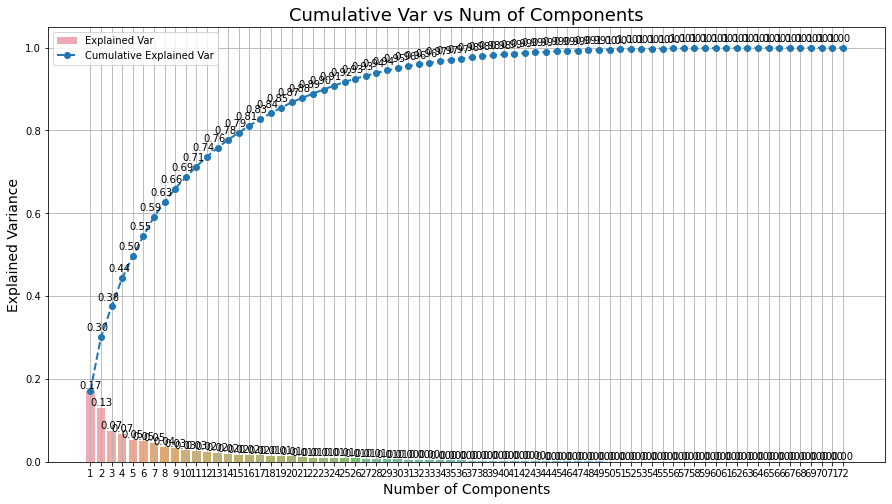

In [227]:
# 데이터의 스케일을 맞춰놓았으니, 이번에는 차원 축소(Dimensionality Reduction)를 진행할 차례네요!
## 여기서는 PCA 라는 선형 차원 축소 기법을 사용해봅시다. PCA 의 PC들이 포착하지 못해서 날라간 정보들은 다른 DR 방법을 통해 보완할 수 있어요

# PCA 불러오기  
from sklearn.decomposition import PCA


# PCA 적용
pca = PCA().fit(mm_df)

print(pca)
print(type(pca))

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ 
    # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
    # EVR: 각 주성분이 데이터의 분산을 얼마나 포착하는지를 나타내는 비율


cumulative_explained_variance = np.cumsum(explained_variance_ratio) 
    # cumsum: 각 원소의 누적합을 계산하는 함수

# 시각화

plt.figure(figsize=(15,8))

# 각 성분의 EVR에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) +1)) , y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 line graph
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Var vs Num of Components', fontsize=18)

# 눈금 및 범례 설정
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
              labels=['Explained Var', 'Cumulative Explained Var'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
        plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha ='center', va= 'bottom', fontsize=10)
        if i > 0:
            plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='both')
plt.show

# 결론 - rs_df
### RobustScaler 가 가장 적은 수의 PC 로 가격 예측
#### 10개의 PC 로 0.79 설명 가능

# 회고

- Flow 를 배운 대로 하면 되는데도 혼자 하려니 헷갈린다
- 특히 의사 결정이 필요한 부분 , missing value 나 outlier 에 오히려 의사 결정이 많이 들어가는 것 같다
- DataType 에서 string, int, NAType 등등에서 함수를 쓸 수 있고/없고가 달라서 어버버 했다
    - missing value 를 median 으로 채우려면 데이터 타입을 numeric 으로 바꿔줘야 하는데, 그러려면 NA 가 없어야 한다
- 오히려 (전처리에 비하면) 모델 돌리는 부분이 쉬워보이는데.. 시간도 얼마 안걸리고. 지금은 간단한 모델만 돌려서 그런가?
- PCA 를 하니 해석은 안된다